# Лабораторная работа №3.3


Логистическая регрессия


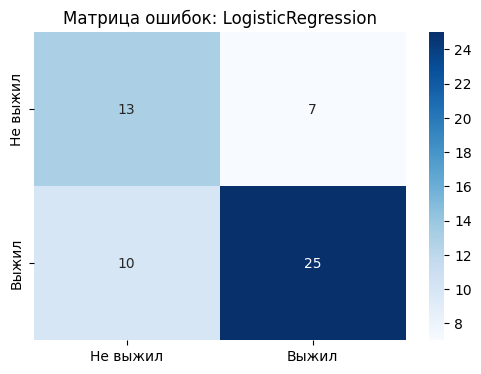

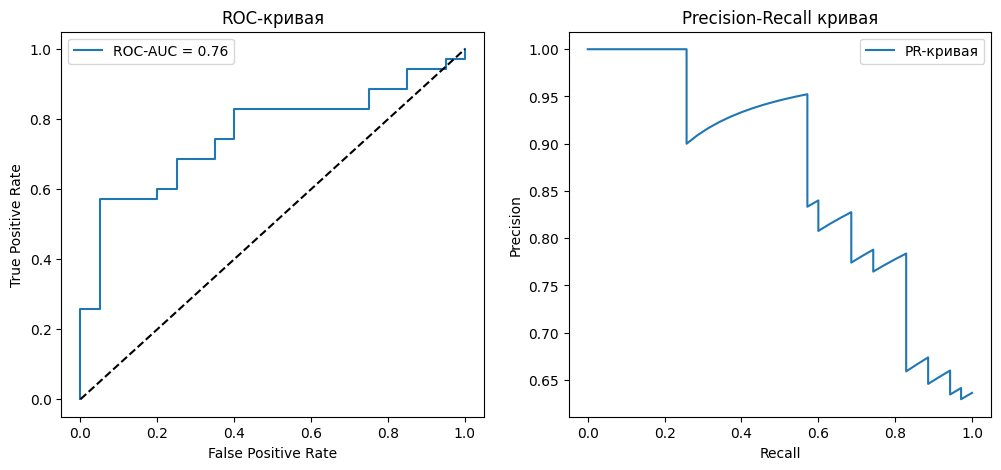


Модель опорных векторов


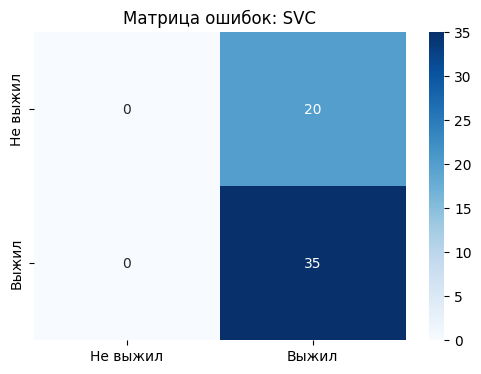

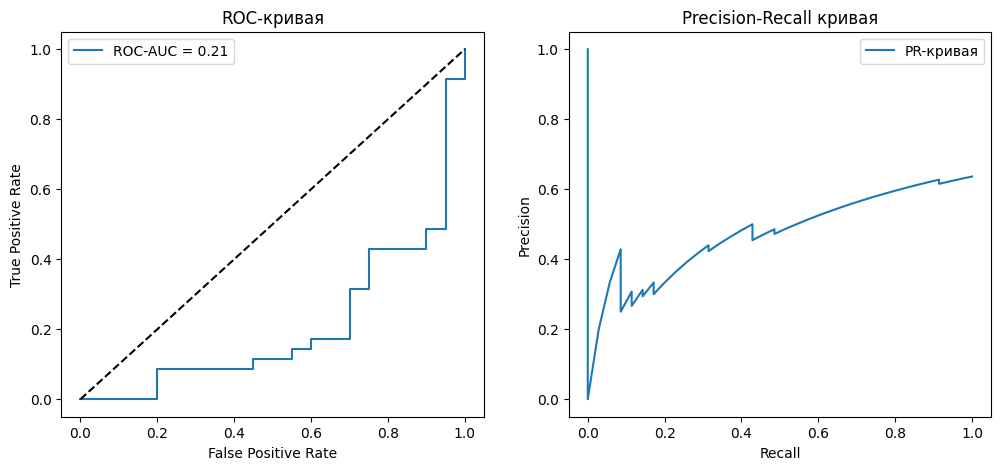


K-ближайших соседей


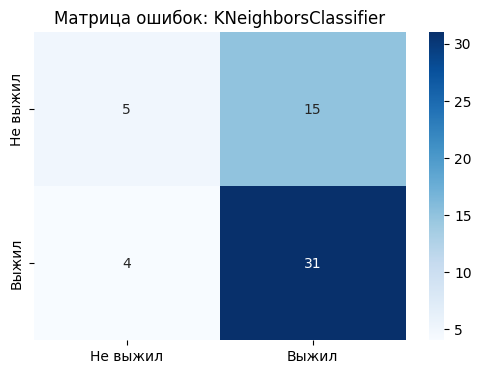

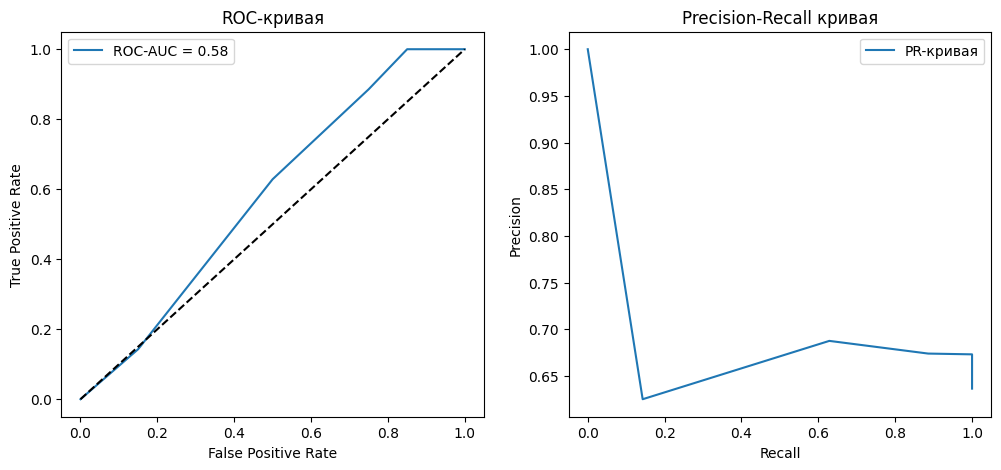


Сравнение моделей:
                     Accuracy  Precision    Recall        F1
Logistic Regression  0.690909   0.781250  0.714286  0.746269
SVM                  0.636364   0.636364  1.000000  0.777778
KNN                  0.654545   0.673913  0.885714  0.765432


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, precision_recall_curve, roc_curve, auc
)

titanic = pd.read_csv('titanic.csv')
titanic_clean = titanic.dropna().drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
titanic_clean['Sex'] = titanic_clean['Sex'].map({'male': 0, 'female': 1})
titanic_clean['Embarked'] = titanic_clean['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})
X = titanic_clean.drop('Survived', axis=1)
y = titanic_clean['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred)
    }
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), 
                annot=True, fmt='d', cmap='Blues',
                xticklabels=['Не выжил', 'Выжил'],
                yticklabels=['Не выжил', 'Выжил'])
    plt.title(f'Матрица ошибок: {model.__class__.__name__}')
    plt.show()
    
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)

        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(fpr, tpr, label=f'ROC-AUC = {roc_auc:.2f}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC-кривая')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.plot(recall, precision, label='PR-кривая')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall кривая')
        plt.legend()
        plt.show()
    
    return metrics

print("\n" + "="*40 + "\nЛогистическая регрессия\n" + "="*40)
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_metrics = evaluate_model(lr_model, X_test, y_test)

print("\n" + "="*40 + "\nМодель опорных векторов\n" + "="*40)
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_metrics = evaluate_model(svm_model, X_test, y_test)

print("\n" + "="*40 + "\nK-ближайших соседей\n" + "="*40)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_metrics = evaluate_model(knn_model, X_test, y_test)

metrics_df = pd.DataFrame([lr_metrics, svm_metrics, knn_metrics], 
                         index=['Logistic Regression', 'SVM', 'KNN'])
print("\nСравнение моделей:")
print(metrics_df)